<a href="https://colab.research.google.com/github/OmarAhmed03/PDE-BS_MODEL/blob/main/analysis_of_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
symbols =  ['PFE', 'TSLA', 'SOFI', 'AMD', 'F', 'MARA', 'AAPL',
          'NIO', 'BAC', 'PLTR', 'AMZN',
          'NVDA', 'LU', 'T', 'OPEN', 'LCID', 'AAL',
          'RIVN', 'UBER', 'INTC', 'PLUG', 'CCL', 'RIOT', 'AFRM', 'DNA',
          'VZ', 'ORCL', 'MPW', 'WFC', 'X', 'NU', 'GOOG', 'GOOGL', 'UEC',
          'VALE', 'MSFT', 'UPST', 'SNAP', 'RIG', 'HOOD', 'LUV', 'SIRI',
          'LYFT', 'WBD', 'BCS', 'BABA', 'GOLD', 'PTON', 'ITUB', 'BBD', 'PARA', 'SWN',
          'AGNC', 'KGC', 'GM', 'KEY', 'GRAB', 'HBAN', 'RUN', 'M', 'PBR', 'CVE', 'XOM', 'NYCB',
          'PYPL', 'ERIC', 'WBA', 'SQ', 'ET', 'KVUE', 'CLF', 'MTCH', 'NCLH', 'U', 'META', 'BMY', 'C',
          'ACAD', 'CSCO', 'OXY', 'SCHW', 'GPS', 'NOK', 'CSX', 'CVNA', 'PCG', 'PATH', 'CHWY', 'FCX', 'KMI',
          'CMCSA', 'ABEV', 'CNHI', 'RBLX', 'ETSY', 'XP', 'NEM', 'JD', 'COIN', 'PINS']

In [ ]:
tickers = yf.Tickers(symbols)
expiry_dates = ['2023-12-15', '2023-12-22', '2023-12-29', '2024-01-05', '2024-01-12', '2024-01-19', '2024-01-26', '2024-02-16', '2024-03-15', '2024-04-19', '2024-05-17', '2024-06-21', '2024-07-19', '2024-09-20', '2024-12-20', '2025-01-17', '2025-06-20', '2025-12-19', '2026-01-16', '2026-06-18']
# expiry_dates = ["2023-12-08", "2023-12-15", '2023-12-22', "2023-12-29", "2024-01-05", "2024-01-12", "2024-01-19", "2024-02-16", "2024-03-15", "2024-04-19", "2024-06-21","2024-09-20","2025-01-17", "2025-06-20", "2025-12-19", "2026-01-16"]

In [ ]:
calls_list = []
#symbols = ['NVDA','GOOG','AMD','META']
for symbol in symbols:
    for expiry_date in expiry_dates:
        try:
            option_chain = tickers.tickers[symbol].option_chain(expiry_date)
        except ValueError:
            continue
        calls = option_chain.calls
        calls['expiry_date'] = expiry_date
        calls['symbol'] = symbol
        calls_list.append(calls)

df_calls = pd.concat(calls_list)


<ipython-input-14-406ab9e2f19c>:14: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_calls = pd.concat(calls_list)


In [ ]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35727 entries, 0 to 14
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   contractSymbol     35727 non-null  object             
 1   lastTradeDate      35727 non-null  datetime64[ns, UTC]
 2   strike             35727 non-null  float64            
 3   lastPrice          35727 non-null  float64            
 4   bid                35704 non-null  float64            
 5   ask                35727 non-null  float64            
 6   change             35727 non-null  float64            
 7   percentChange      35727 non-null  float64            
 8   volume             34413 non-null  float64            
 9   openInterest       35722 non-null  float64            
 10  impliedVolatility  35727 non-null  float64            
 11  inTheMoney         35727 non-null  float64            
 12  contractSize       35727 non-null  object        

In [ ]:
dff = df_calls[['contractSymbol','lastTradeDate','strike','lastPrice','impliedVolatility','expiry_date','symbol']]

In [ ]:
dff['lastTradeDate'] = dff['lastTradeDate'].apply(pd.to_datetime)
dff['expiry_date'] = dff['expiry_date'].apply(pd.to_datetime)
dff.info()

<ipython-input-17-51de4aef46f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['lastTradeDate'] = dff['lastTradeDate'].apply(pd.to_datetime)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35727 entries, 0 to 14
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   contractSymbol     35727 non-null  object             
 1   lastTradeDate      35727 non-null  datetime64[ns, UTC]
 2   strike             35727 non-null  float64            
 3   lastPrice          35727 non-null  float64            
 4   impliedVolatility  35727 non-null  float64            
 5   expiry_date        35727 non-null  datetime64[ns]     
 6   symbol             35727 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(3), object(2)
memory usage: 2.2+ MB


<ipython-input-17-51de4aef46f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['expiry_date'] = dff['expiry_date'].apply(pd.to_datetime)


In [ ]:
dff['lastTradeDate'] = dff['lastTradeDate'].dt.tz_convert(None)
dff['lastTradeDate'] = dff['lastTradeDate'].dt.strftime('%Y-%m-%d')
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35727 entries, 0 to 14
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   contractSymbol     35727 non-null  object        
 1   lastTradeDate      35727 non-null  object        
 2   strike             35727 non-null  float64       
 3   lastPrice          35727 non-null  float64       
 4   impliedVolatility  35727 non-null  float64       
 5   expiry_date        35727 non-null  datetime64[ns]
 6   symbol             35727 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 2.2+ MB


<ipython-input-18-f5a5a168dc96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['lastTradeDate'] = dff['lastTradeDate'].dt.tz_convert(None)
<ipython-input-18-f5a5a168dc96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['lastTradeDate'] = dff['lastTradeDate'].dt.strftime('%Y-%m-%d')


In [ ]:
dff['lastTradeDate'] = dff['lastTradeDate'].apply(pd.to_datetime)
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35727 entries, 0 to 14
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   contractSymbol     35727 non-null  object        
 1   lastTradeDate      35727 non-null  datetime64[ns]
 2   strike             35727 non-null  float64       
 3   lastPrice          35727 non-null  float64       
 4   impliedVolatility  35727 non-null  float64       
 5   expiry_date        35727 non-null  datetime64[ns]
 6   symbol             35727 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 2.2+ MB


<ipython-input-19-d222db05ed04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['lastTradeDate'] = dff['lastTradeDate'].apply(pd.to_datetime)


In [ ]:
dff['dates diff'] = (dff['expiry_date'] - dff['lastTradeDate'])/np.timedelta64(1, 'D')

<ipython-input-20-8d463e40a60b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['dates diff'] = (dff['expiry_date'] - dff['lastTradeDate'])/np.timedelta64(1, 'D')


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35727 entries, 0 to 14
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   contractSymbol     35727 non-null  object        
 1   lastTradeDate      35727 non-null  datetime64[ns]
 2   strike             35727 non-null  float64       
 3   lastPrice          35727 non-null  float64       
 4   impliedVolatility  35727 non-null  float64       
 5   expiry_date        35727 non-null  datetime64[ns]
 6   symbol             35727 non-null  object        
 7   dates diff         35727 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 2.5+ MB


In [ ]:
dff.isna().describe()

,contractSymbol,lastTradeDate,strike,lastPrice,impliedVolatility,expiry_date,symbol,dates diff
count,35727,35727,35727,35727,35727,35727,35727,35727
unique,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False
freq,35727,35727,35727,35727,35727,35727,35727,35727


In [ ]:
piv = pd.pivot_table(dff,aggfunc='count',index=['symbol'])
piv

,contractSymbol,dates diff,expiry_date,impliedVolatility,lastPrice,lastTradeDate,strike
symbol,,,,,,,
AAL,323,323,323,323,323,323,323
AAPL,783,783,783,783,783,783,783
ABEV,29,29,29,29,29,29,29
ACAD,102,102,102,102,102,102,102
AFRM,547,547,547,547,547,547,547
...,...,...,...,...,...,...,...
WBD,165,165,165,165,165,165,165
WFC,295,295,295,295,295,295,295
X,281,281,281,281,281,281,281


In [ ]:
dff.head()

,contractSymbol,lastTradeDate,strike,lastPrice,impliedVolatility,expiry_date,symbol,dates diff
0,PFE231215C00017500,2023-12-13,17.5,9.10,0.000010,2023-12-15,PFE,2.0
1,PFE231215C00019000,2023-09-25,19.0,13.90,11.316409,2023-12-15,PFE,81.0
2,PFE231215C00020000,2023-12-13,20.0,6.32,0.000010,2023-12-15,PFE,2.0
3,PFE231215C00021000,2023-12-13,21.0,5.65,0.000010,2023-12-15,PFE,2.0
4,PFE231215C00022500,2023-12-13,22.5,4.12,0.000010,2023-12-15,PFE,2.0


In [ ]:
# Get the stock price at the last trade date for each symbol
last_trade_prices = []
for symbol, last_trade_date in zip(dff['symbol'], dff['lastTradeDate']):
    ticker = yf.Ticker(symbol)
    history = ticker.history(start=last_trade_date, end=last_trade_date + pd.Timedelta(days=1))
    last_trade_price = history['Close'].values[0]
    last_trade_prices.append(last_trade_price)

# Add the stock price column to the dff dataframe
dff['lastTradePrice'] = last_trade_prices


<ipython-input-25-960ac82d07b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['lastTradePrice'] = last_trade_prices


In [ ]:
dff

,contractSymbol,lastTradeDate,strike,lastPrice,impliedVolatility,expiry_date,symbol,dates diff,lastTradePrice
0,PFE231215C00017500,2023-12-13,17.5,9.10,0.000010,2023-12-15,PFE,2.0,26.660000
1,PFE231215C00019000,2023-09-25,19.0,13.90,11.316409,2023-12-15,PFE,81.0,32.541264
2,PFE231215C00020000,2023-12-13,20.0,6.32,0.000010,2023-12-15,PFE,2.0,26.660000
3,PFE231215C00021000,2023-12-13,21.0,5.65,0.000010,2023-12-15,PFE,2.0,26.660000
4,PFE231215C00022500,2023-12-13,22.5,4.12,0.000010,2023-12-15,PFE,2.0,26.660000
...,...,...,...,...,...,...,...,...,...
10,PINS260116C00040000,2023-12-13,40.0,8.85,0.015635,2026-01-16,PINS,765.0,36.509998
11,PINS260116C00042000,2023-12-13,42.0,8.20,0.031260,2026-01-16,PINS,765.0,36.509998
12,PINS260116C00045000,2023-12-12,45.0,7.05,0.031260,2026-01-16,PINS,766.0,36.130001
13,PINS260116C00047000,2023-12-12,47.0,6.40,0.031260,2026-01-16,PINS,766.0,36.130001


In [ ]:
dff.rename(columns={"lastTradePrice":"Stock price"},inplace=True)
dff

<ipython-input-27-07b75d2cbf05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.rename(columns={"lastTradePrice":"Stock price"},inplace=True)


,contractSymbol,lastTradeDate,strike,lastPrice,impliedVolatility,expiry_date,symbol,dates diff,Stock price
0,PFE231215C00017500,2023-12-13,17.5,9.10,0.000010,2023-12-15,PFE,2.0,26.660000
1,PFE231215C00019000,2023-09-25,19.0,13.90,11.316409,2023-12-15,PFE,81.0,32.541264
2,PFE231215C00020000,2023-12-13,20.0,6.32,0.000010,2023-12-15,PFE,2.0,26.660000
3,PFE231215C00021000,2023-12-13,21.0,5.65,0.000010,2023-12-15,PFE,2.0,26.660000
4,PFE231215C00022500,2023-12-13,22.5,4.12,0.000010,2023-12-15,PFE,2.0,26.660000
...,...,...,...,...,...,...,...,...,...
10,PINS260116C00040000,2023-12-13,40.0,8.85,0.015635,2026-01-16,PINS,765.0,36.509998
11,PINS260116C00042000,2023-12-13,42.0,8.20,0.031260,2026-01-16,PINS,765.0,36.509998
12,PINS260116C00045000,2023-12-12,45.0,7.05,0.031260,2026-01-16,PINS,766.0,36.130001
13,PINS260116C00047000,2023-12-12,47.0,6.40,0.031260,2026-01-16,PINS,766.0,36.130001


In [ ]:
#dff = pd.read_excel("cleaned data2.xlsx")
dff.head()

,contractSymbol,lastTradeDate,strike,lastPrice,impliedVolatility,expiry_date,symbol,dates diff,Stock price
0,NVDA231215C00140000,2023-12-13,140.0,343.89,0.00001,2023-12-15,NVDA,2.0,480.880005
1,NVDA231215C00145000,2023-12-13,145.0,336.15,0.00001,2023-12-15,NVDA,2.0,480.880005
2,NVDA231215C00150000,2023-12-13,150.0,330.10,0.00001,2023-12-15,NVDA,2.0,480.880005
3,NVDA231215C00155000,2023-12-13,155.0,330.27,0.00001,2023-12-15,NVDA,2.0,480.880005
4,NVDA231215C00160000,2023-12-11,160.0,300.40,0.00001,2023-12-15,NVDA,4.0,466.269989


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4877 entries, 0 to 74
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   contractSymbol     4877 non-null   object        
 1   lastTradeDate      4877 non-null   datetime64[ns]
 2   strike             4877 non-null   float64       
 3   lastPrice          4877 non-null   float64       
 4   impliedVolatility  4877 non-null   float64       
 5   expiry_date        4877 non-null   datetime64[ns]
 6   symbol             4877 non-null   object        
 7   dates diff         4877 non-null   float64       
 8   lastTradePrice     4877 non-null   float64       
dtypes: datetime64[ns](2), float64(5), object(2)
memory usage: 381.0+ KB


In [ ]:
# dff = dff.iloc[:,1:]
# dff.head()

,contractSymbol,lastTradeDate,strike,lastPrice,impliedVolatility,expiry_date,symbol,dates diff,Stock price
0,MSFT231208C00170000,2023-12-06,170.0,198.95,5.085941,2023-12-08,MSFT,2,368.799988
1,MSFT231208C00210000,2023-11-01,210.0,135.35,5.415042,2023-12-08,MSFT,37,345.369019
2,MSFT231208C00235000,2023-11-14,235.0,135.42,3.187502,2023-12-08,MSFT,24,369.519989
3,MSFT231208C00240000,2023-12-04,240.0,128.70,3.602540,2023-12-08,MSFT,4,369.140015
4,MSFT231208C00245000,2023-12-01,245.0,127.40,2.300785,2023-12-08,MSFT,7,374.510010


KeyboardInterrupt: ignored

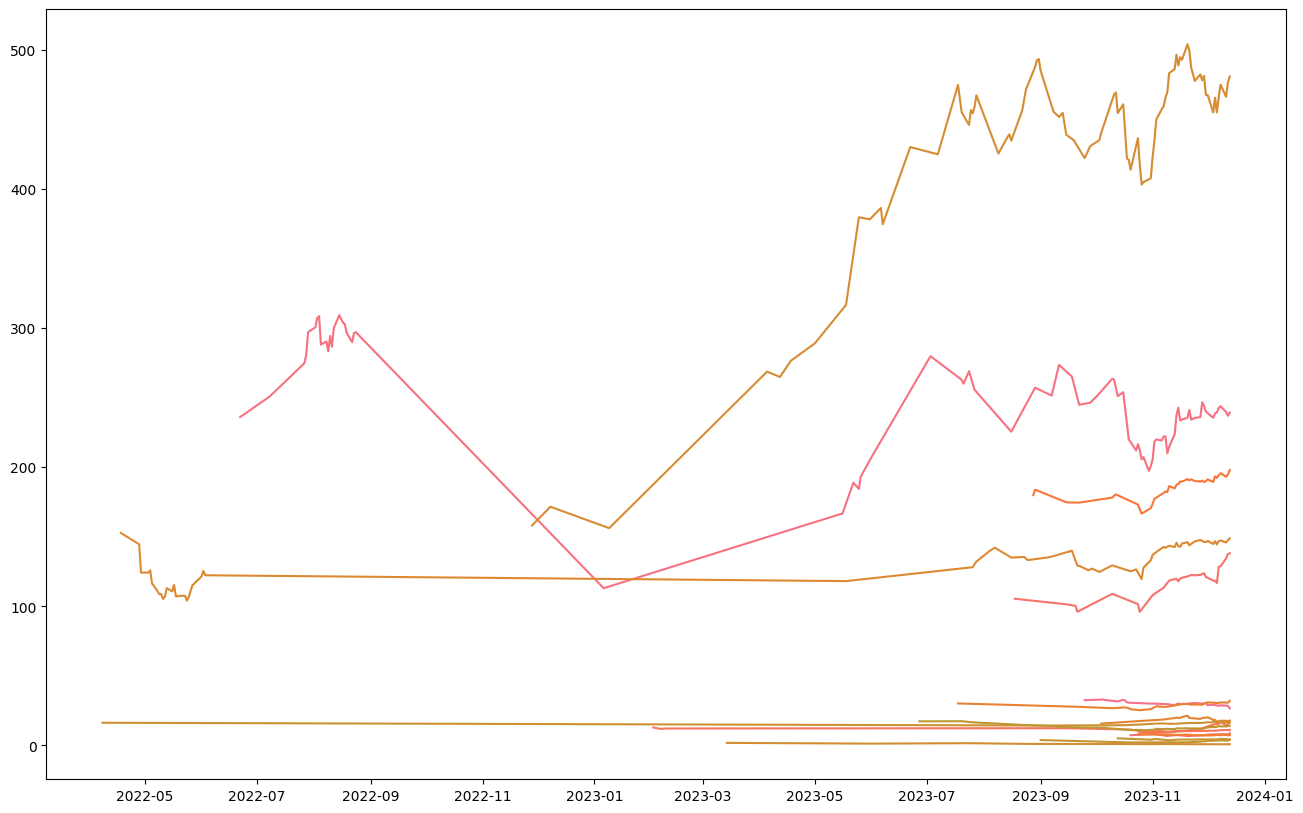

In [ ]:
plt.figure(figsize=(16,10))
sns.lineplot(data=dff,x='lastTradeDate',y='Stock price',hue='symbol')
plt.title('Stock price at trading times')
plt.show()

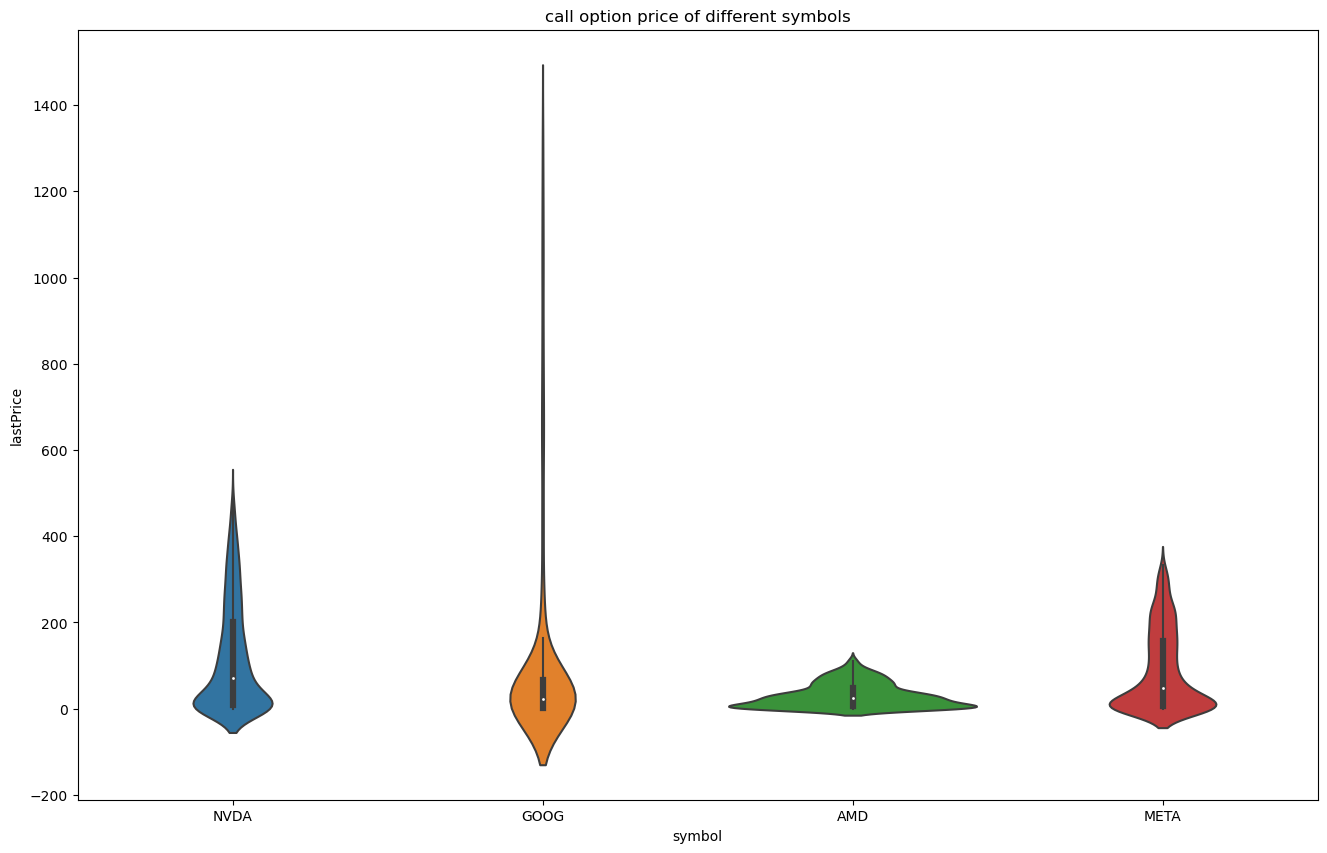

In [ ]:
plt.figure(figsize=(16,10))
sns.violinplot(data=dff,x='symbol',y='lastPrice')
plt.title('call option price of different symbols')
plt.show()

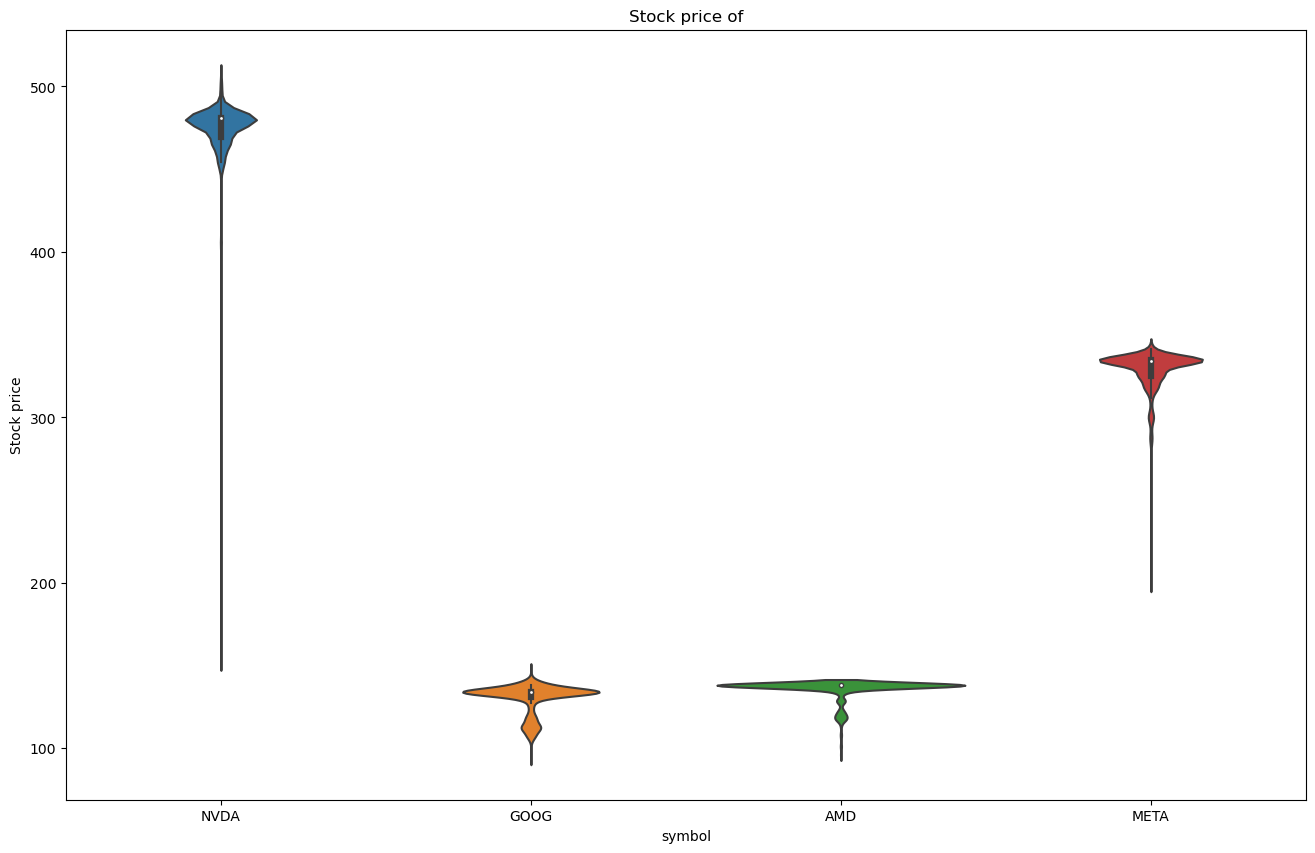

In [ ]:
plt.figure(figsize=(16,10))
sns.violinplot(data=dff,x='symbol',y='Stock price')
plt.title('Stock price of')
plt.show()

In [ ]:
piv1 = pd.pivot_table(dff,index=['strike'],aggfunc='count')
piv1 = piv1.sort_values(by=['Stock price'],ascending=False)
piv1.iloc[0:40,:]

,Stock price,contractSymbol,dates diff,expiry_date,impliedVolatility,lastPrice,lastTradeDate,symbol
strike,,,,,,,,
20.0,658,658,658,658,658,658,658,658
25.0,623,623,623,623,623,623,623,623
30.0,622,622,622,622,622,622,622,622
15.0,617,617,617,617,617,617,617,617
35.0,581,581,581,581,581,581,581,581
10.0,512,512,512,512,512,512,512,512
5.0,510,510,510,510,510,510,510,510
40.0,496,496,496,496,496,496,496,496
50.0,457,457,457,457,457,457,457,457


In [ ]:
dff_180 = dff.loc[dff['strike'] == 20]

In [ ]:
z = np.array(dff_180['lastPrice'])
y= np.array(dff_180['dates diff'])/365
x = np.array(dff_180['Stock price'])

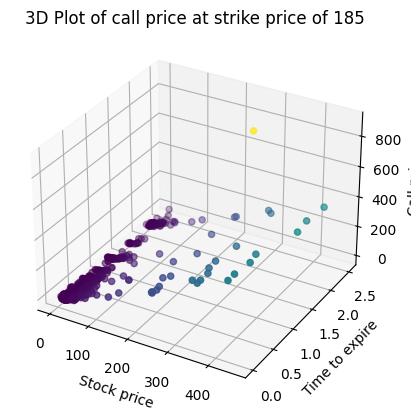

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z,c=z)

ax.set_xlabel('Stock price')
ax.set_ylabel('Time to expire')
ax.set_zlabel('Call price')
ax.set_title('3D Plot of call price at strike price of 185')
#plt.colorbar(label='z')

plt.show()


In [ ]:
dff.describe()

,strike,lastPrice,impliedVolatility,dates diff,Stock price
count,35727.000000,35727.000000,35727.000000,35727.000000,35727.000000
mean,163.558230,33.963996,0.165873,187.674280,115.886382
std,380.722103,100.049276,0.697095,234.796544,135.571782
min,0.350000,0.010000,0.000000,2.000000,0.860300
25%,20.000000,0.440000,0.000010,23.000000,19.219999
50%,50.000000,4.400000,0.000010,65.000000,49.340000
75%,155.000000,20.150000,0.125009,262.000000,148.839996
max,5400.000000,1499.750000,39.875004,967.000000,504.045685


In [ ]:
dff_cleaned = dff.loc[dff['strike']<=401]
dff_cleaned.describe()

,strike,lastPrice,impliedVolatility,dates diff,Stock price
count,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000
mean,201.164685,63.141647,0.654942,209.445295,235.305748
std,97.568658,75.427595,0.756860,245.933905,77.966406
min,1.670000,0.010000,0.000000,1.000000,113.059998
25%,130.000000,6.050000,0.331954,29.000000,186.399994
50%,187.500000,41.700000,0.501561,99.000000,238.830002
75%,275.000000,98.000000,0.685695,290.000000,242.639999
max,400.000000,890.490000,13.070314,879.000000,382.700012


In [ ]:
import numpy as np
from scipy.stats import norm

def black_scholes_analytic(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

In [ ]:
r = 0.05

In [ ]:
S = np.array(dff_180['Stock price'])
K = np.array(dff_180['strike'])
T = np.array(dff_180['dates diff'])/365
sigma = np.array(dff_180['impliedVolatility'])

In [ ]:
V = black_scholes_analytic(S,K,T,r,sigma)

In [ ]:
V_true = np.array(dff_180['lastPrice'])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(V_true,V)

564.2076444214775

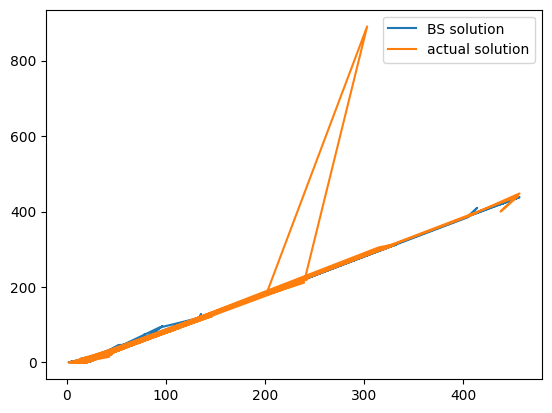

In [ ]:
plt.plot(S,V,label = 'BS solution')
plt.plot(S,V_true, label = 'actual solution')
plt.legend()
plt.show()

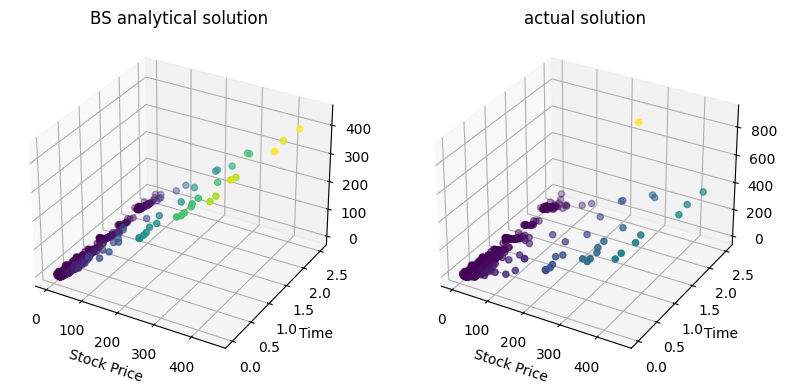

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(S, T, V,c=V)
plt.xlabel('Stock Price')
plt.ylabel('Time')
plt.title('BS analytical solution')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(S, T, V_true,c=V_true)
plt.xlabel('Stock Price')
plt.ylabel('Time')
plt.title('actual solution')

plt.show()

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4697 entries, 0 to 4696
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   contractSymbol     4697 non-null   object        
 1   lastTradeDate      4697 non-null   datetime64[ns]
 2   strike             4697 non-null   float64       
 3   lastPrice          4697 non-null   float64       
 4   impliedVolatility  4697 non-null   float64       
 5   expiry_date        4697 non-null   datetime64[ns]
 6   symbol             4697 non-null   object        
 7   dates diff         4697 non-null   int64         
 8   Stock price        4697 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 330.4+ KB


In [ ]:
mask = (dff['strike'] >= 20) & (dff['strike'] <= 155)
dff_cleaned = dff.loc[mask]

<ipython-input-34-71c7328c4ac9>:5: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


208.37460301940976


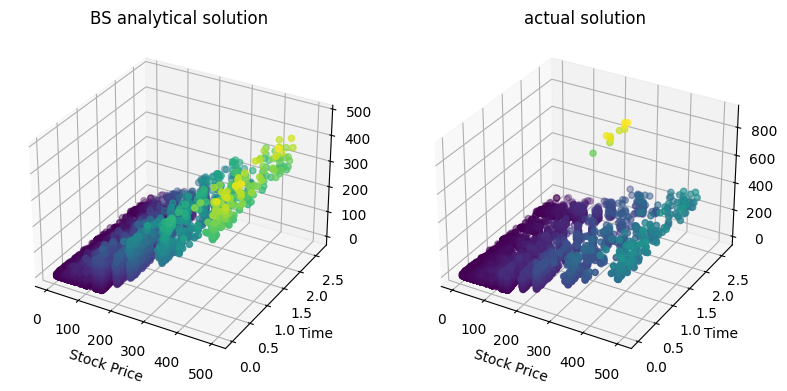

In [ ]:
r = 0.005
S = np.array(dff_cleaned['Stock price'])
K = np.array(dff_cleaned['strike'])
T = np.array(dff_cleaned['dates diff'])/365
sigma = np.array(dff_cleaned['impliedVolatility'])
dff_180
V = black_scholes_analytic(S,K,T,r,sigma)
pd.DataFrame(V)
V_true = np.array(dff_cleaned['lastPrice'])
pd.DataFrame(V_true)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(V_true,V))
# plt.plot(S,V,label = 'BS solution')
# plt.plot(S,V_true, label = 'actual solution')
# plt.legend()
# plt.show()

#%matplotlib widget

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(S, T, V,c=V)
plt.xlabel('Stock Price')
plt.ylabel('Time')
plt.title('BS analytical solution')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(S, T, V_true,c=V_true)
plt.xlabel('Stock Price')
plt.ylabel('Time')
plt.title('actual solution')

plt.show()

In [ ]:
dff.to_excel("cleaned data3.xlsx")
dff.to_csv('big data')

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,mean_squared_log_error

In [ ]:
mse = mean_squared_error(V_true,V)
mae = mean_absolute_error(V_true,V)
mape = mean_absolute_percentage_error(V_true,V)
msle = mean_squared_log_error(V_true,V)

In [ ]:
metrics_dict = {
    'Mean Squared Error': mse,
    'Mean Absolute Error': mae,
    'Mean Absolute Percentage Error': mape,
    'Mean Squared Log Error': msle
}


In [ ]:
metrics_df = pd.DataFrame.from_dict(metrics_dict,orient="index")
metrics_df

,0
Mean Squared Error,208.374603
Mean Absolute Error,2.749550
Mean Absolute Percentage Error,2.589392
Mean Squared Log Error,0.513199
